# Preprocessing and Data Exploration

<!--
SPDX-FileCopyrightText: 2025 Johannes Herstad and Sigurd Gjerdingen
SPDX-License-Identifier: MIT
-->

In [1]:
# Set root directory of the project as the current working directory
import os
initial_dir = os.getcwd()  # Save initial directory (notebooks/)
os.chdir('..')  # Move to project/

In [4]:
# Third-party imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import mat4py as mpy
import plotly.express as px
import plotly.graph_objects as go
from plotly.colors import sample_colorscale
import pickle

# Local imports
from config.defaults import Config
from src.models import load_preprocessed_data
from src.preprocessing import preprocess_aachen_dataset, preprocess_mit_stanford_dataset

# Initialize configuration
config = Config()

In [ ]:
# Preprocess the Aachen dataset
config.use_aachen = True
config.eol_capacity = 0.65
# Labels and bins needs to be set in config

# Preprocess the dataset for regression
config.classification = False
preprocess_aachen_dataset(config)

# Preprocess the dataset for classification
config.classification = True 
preprocess_aachen_dataset(config)

In [ ]:
# Preprocess the MIT-Stanford dataset
config.use_aachen = False
config.eol_capacity = 0.80
# Labels and bins needs to be set in config


# Preprocess MIT-Stanford dataset for regression
config.classification = False  
preprocess_mit_stanford_dataset(config)

# Preprocess MIT-Stanford dataset for classification
config.classification = True
preprocess_mit_stanford_dataset(config)


/Users/johannesherstad/Master_Herstad-Gjerdingen/src/preprocessing.py:291: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seq = pd.Series(seq).interpolate(method='linear', limit_direction='both').fillna(method='bfill').fillna(method='ffill').values


Preprocessing complete! Data saved in data/MIT_Stanford/processed/


/Users/johannesherstad/Master_Herstad-Gjerdingen/src/preprocessing.py:291: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seq = pd.Series(seq).interpolate(method='linear', limit_direction='both').fillna(method='bfill').fillna(method='ffill').values
/Users/johannesherstad/Master_Herstad-Gjerdingen/src/preprocessing.py:420: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  y_train = to_categorical(cat_y_train.map(label_mapping).astype(int), num_classes=len(labels))
/Users/johannesherstad/Master_Herstad-Gjerdingen/src/preprocessing.py:421: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_

Preprocessing complete! Data saved in data/MIT_Stanford/processed/


## Data Exploration

### Aachen 

In [5]:
data_loader = mpy.loadmat("data/Aachen/raw/Degradation_Prediction_Dataset_ISEA.mat")
df = pd.DataFrame.from_dict(data_loader["TDS"])

df

,Cell,Sample,History_Cycle,History,Target_Cycle_Expanded,Target_expanded,Target_Cycle,Target
0,1,1,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[105, 110, 115, 120, 125, 130, 135, 140, 145, ...","[1.7973466099593307, 1.7957194104838883, 1.794...","[105, 150, 195, 240, 285, 330, 375, 420, 465, ...","[1.7973466099593307, 1.7832393947563925, 1.770..."
1,1,2,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[110, 115, 120, 125, 130, 135, 140, 145, 150, ...","[1.7957194104838883, 1.794106179214274, 1.7925...","[110, 155, 200, 245, 290, 335, 380, 425, 470, ...","[1.7957194104838883, 1.7817527911332156, 1.769..."
2,1,3,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[115, 120, 125, 130, 135, 140, 145, 150, 155, ...","[1.794106179214274, 1.7925073295393719, 1.7909...","[115, 160, 205, 250, 295, 340, 385, 430, 475, ...","[1.794106179214274, 1.7802836132202329, 1.7676..."
3,1,4,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[120, 125, 130, 135, 140, 145, 150, 155, 160, ...","[1.7925073295393719, 1.7909232748480652, 1.789...","[120, 165, 210, 255, 300, 345, 390, 435, 480, ...","[1.7925073295393719, 1.7788295719024707, 1.766..."
4,1,5,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[125, 130, 135, 140, 145, 150, 155, 160, 165, ...","[1.7909232748480652, 1.7893544285292378, 1.787...","[125, 170, 215, 260, 305, 350, 395, 440, 485, ...","[1.7909232748480652, 1.7773897124807985, 1.765..."
...,...,...,...,...,...,...,...,...
10681,47,10682,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.84724471159825, 1.845306403634897, 1.843378...","[1195, 1200, 1205, 1210, 1215, 1220, 1225, 123...","[1.4027216711179482, 1.3979441697822066, 1.393...","[1195, 1240, 1285, 1330, 1375, 1420, 1465, 151...","[1.4027216711179482, 1.3580654511370822, 1.309..."
10682,47,10683,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.84724471159825, 1.845306403634897, 1.843378...","[1200, 1205, 1210, 1215, 1220, 1225, 1230, 123...","[1.3979441697822066, 1.3931186077270967, 1.388...","[1200, 1245, 1290, 1335, 1380, 1425, 1470, 151...","[1.3979441697822066, 1.3528860367290538, 1.303..."
10683,47,10684,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.84724471159825, 1.845306403634897, 1.843378...","[1205, 1210, 1215, 1220, 1225, 1230, 1235, 124...","[1.3931186077270967, 1.3882458358804528, 1.383...","[1205, 1250, 1295, 1340, 1385, 1430, 1475, 152...","[1.3931186077270967, 1.3476662199521636, 1.298..."
10684,47,10685,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.84724471159825, 1.845306403634897, 1.843378...","[1210, 1215, 1220, 1225, 1230, 1235, 1240, 124...","[1.3882458358804528, 1.383326705170109, 1.3783...","[1210, 1255, 1300, 1345, 1390, 1435, 1480, 152...","[1.3882458358804528, 1.342406851734246, 1.2921..."


In [6]:
# Create a list to store aggregated data, preserving cell order
history_agg_list = []

# Assuming df is sorted by "Cell" as in the original order you want
# If not, sort it first: df = df.sort_values("Cell")

# Loop through all unique cell IDs in the order they appear in df
for cell_id in df["Cell"].unique():
    # Filter data for the current cell
    df_cell_i = df[df["Cell"] == cell_id]
    
    # Get the last sample for this cell
    last_sample = df_cell_i.iloc[-1]
    
    # Extract history and target arrays
    history_data = np.array(last_sample["History"])
    history_cycle = np.array(last_sample["History_Cycle"])
    target_data = np.array(last_sample["Target_expanded"])
    target_cycle = np.array(last_sample["Target_Cycle_Expanded"])
    
    # Concatenate the history and target arrays
    value_data = np.concatenate((history_data, target_data), axis=0)
    cycle_data = np.concatenate((history_cycle, target_cycle), axis=0)
    
    # Store the concatenated data for this cell
    history_agg_list.append({
        "Cell": cell_id,
        "Cycle": cycle_data,
        "Value": value_data
    })

# Convert to DataFrame to maintain order
history_agg_df = pd.DataFrame(history_agg_list)

In [7]:
history_agg_df

,Cell,Cycle,Value
0,1,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303..."
1,2,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.845058495451667, 1.8419984665415141, 1.8389..."
2,3,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.840036111156223, 1.8372405290428224, 1.8344..."
3,4,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.836350335297539, 1.8345300178698336, 1.8327..."
4,5,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.827606331067727, 1.8254456233245018, 1.8232..."
5,6,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.832208014322532, 1.830601191788663, 1.82899..."
6,7,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.835825928297709, 1.8339510304090747, 1.8320..."
7,8,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.835988407303375, 1.833727801546082, 1.83148..."
8,9,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.831556955767155, 1.8301691290462887, 1.8287..."
9,10,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.836793169988596, 1.8351719721533677, 1.8335..."


In [9]:
# Prepare the data
df_long = history_agg_df.explode(["Cycle", "Value"]).reset_index(drop=True)
df_long["Cycle"] = pd.to_numeric(df_long["Cycle"])
df_long["Value"] = pd.to_numeric(df_long["Value"])

# Create a single figure
fig = go.Figure()

# Get unique cell IDs
cell_ids = df_long["Cell"].unique()
colorscale = "Viridis"
num_cells = len(cell_ids)

# Add a trace for each cell with a color gradient
for i, cell_id in enumerate(cell_ids):
    df_cell = df_long[df_long["Cell"] == cell_id]
    color = sample_colorscale(colorscale, i / (num_cells - 1) if num_cells > 1 else 0)[0]
    fig.add_trace(
        go.Scatter(
            x=df_cell["Cycle"],
            y=df_cell["Value"],
            mode="lines",  # No markers for clarity with 47 lines
            line=dict(width=1, color=color),  # Thinner lines
            opacity=0.7,  # Slight transparency for overlap
            showlegend=False,  # No legend
        )
    )

# Determine the maximum cycle value to set x-axis range
max_cycle = df_long["Cycle"].max()
min_cycle = df_long["Cycle"].min()

# Customize layout for thesis quality
fig.update_layout(
    font=dict(family="Times New Roman", size=18),  # Match 11pt thesis body text
    title=dict(
        text="Aachen - Battery Capacity Over Cycles",
        x=0.5,
        xanchor="center",
        font=dict(size=24)  # Slightly smaller title
    ),
    xaxis_title="Cycle Number",
    yaxis_title="Capacity (Ah)",
    template="plotly_white",
    width=1102,  # 14 cm at 200 DPI
    height=709,  # 9 cm at 200 DPI
    margin=dict(l=60, r=60, t=80, b=60),
)

# Save as PDF for thesis
fig.write_image("data/Aachen/raw/capacity_degradation_aachen.pdf", engine="kaleido")

fig.show()

### Stanford

In [10]:
# Load the pickle file
batch1 = pickle.load(open(r'data/MIT_Stanford/raw/batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']



In [11]:
batch2 = pickle.load(open(r'data/MIT_Stanford/raw/batch2.pkl','rb'))

# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [12]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [13]:
batch3 = pickle.load(open(r'data/MIT_Stanford/raw/batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']

In [14]:
bat_dict = {**batch1, **batch2, **batch3}

In [16]:
# Assuming bat_dict is already loaded
# Define fixed capacity limits
min_cap = 0.5  # Minimum allowed discharge capacity
max_cap = 1.2  # Maximum allowed discharge capacity

# Create the figure
fig = go.Figure()

# Get battery keys and determine the number for color sampling
cell_keys = list(bat_dict.keys())
num_cells = len(cell_keys)
colorscale = "Viridis"

# Loop through each battery in bat_dict, clean the data, and assign a Viridis color
for i, cell_key in enumerate(cell_keys):
    cycle_numbers = np.array(bat_dict[cell_key]['summary']['cycle'])
    discharge_capacity = np.array(bat_dict[cell_key]['summary']['QD'])

    # Replace out-of-bound values with NaN
    discharge_capacity[(discharge_capacity < min_cap) | (discharge_capacity > max_cap)] = np.nan

    # Interpolate to fill NaN values (forward and backward filling)
    discharge_capacity = pd.Series(discharge_capacity)\
                          .interpolate(method='linear', limit_direction='both')\
                          .fillna(method='bfill')\
                          .fillna(method='ffill').values

    # Sample a color from the Viridis colorscale based on the battery's index
    color = px.colors.sample_colorscale(
        colorscale, 
        i / (num_cells - 1) if num_cells > 1 else 0
    )[0]

    fig.add_trace(go.Scatter(
        x=cycle_numbers,
        y=discharge_capacity,
        mode='lines',  # Display both lines and markers
        showlegend=False,      # Hide legend for clarity
        line=dict(width=1, color=color), # Assign Viridis color to the line
        opacity=0.7
    ))

# Update the layout for clarity and thesis-quality appearance
fig.update_layout(
    font=dict(family="Times New Roman", size=18),  # Use Times New Roman, 18pt for body text
    title=dict(
        text="Stanford - Battery Capacity Over Cycles",
        x=0.5,
        xanchor="center",
        font=dict(size=24)  # Title font size of 20pt
    ),
    xaxis_title="Cycle Number",
    yaxis_title="Discharge Capacity (Ah)",
    template="plotly_white",  # Clean white background template
    width=1102,  # 14 cm at 200 DPI
    height=709,  # 9 cm at 200 DPI
    margin=dict(l=60, r=60, t=80, b=60),
)

# Save as PDF for thesis
fig.write_image("data/MIT_Stanford/raw//capacity_degradation_stanford.pdf", engine="kaleido")

# Display the figure
fig.show()

/var/folders/z1/528lx89d6n3dbf9zzwd4qmw00000gn/T/ipykernel_32818/3466259099.py:25: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/z1/528lx89d6n3dbf9zzwd4qmw00000gn/T/ipykernel_32818/3466259099.py:26: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [4]:
config.model_task = 'cnn_classification'
config.use_aachen = True

2025-04-22 12:02:29,210 - INFO - Loaded preprocessed data and metadata for cnn_classification with EOL 0.65


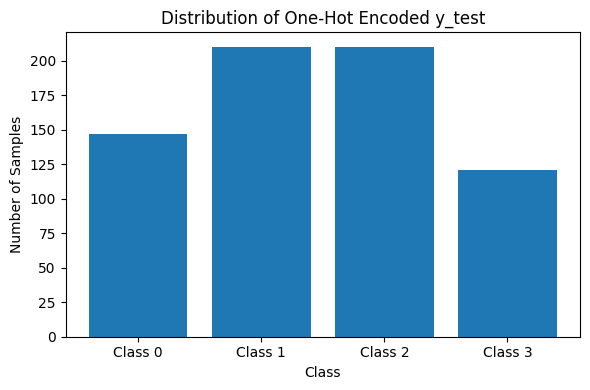

In [5]:
X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    config.model_task, config.eol_capacity, config.use_aachen)

# 1) Count samples per class
class_counts = y_test.sum(axis=0)

# 2) (Optional) If you want percentages instead of absolute counts:
# class_percentages = class_counts / class_counts.sum() * 100

# 3) Set up class labels (adjust names as needed)
class_labels = ["Class 0", "Class 1", "Class 2", "Class 3"]

# 4) Plot
plt.figure(figsize=(6,4))
plt.bar(class_labels, class_counts)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Distribution of One‑Hot Encoded y_test")
plt.tight_layout()
plt.show()


In [ ]:

model_task = 'regression'
dataset = 'MIT_Stanford'


X_train, X_val, X_test, y_train, y_val, y_test, metadata = load_preprocessed_data(
    model_task, config.eol_capacity, dataset=dataset)

2025-04-03 09:12:22,585 - INFO - Loaded preprocessed data and metadata for regression with EOL 0.8


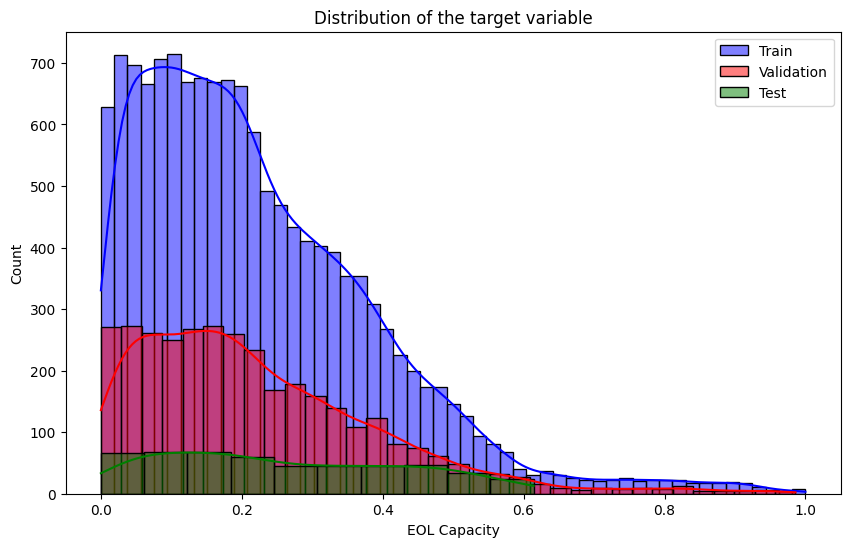

In [ ]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True, color='blue', label='Train')

sns.histplot(y_val, kde=True, color='red', label='Validation')

sns.histplot(y_test, kde=True, color='green', label='Test')

plt.title('Distribution of the target variable')
plt.xlabel('EOL Capacity')
plt.legend()
plt.show()

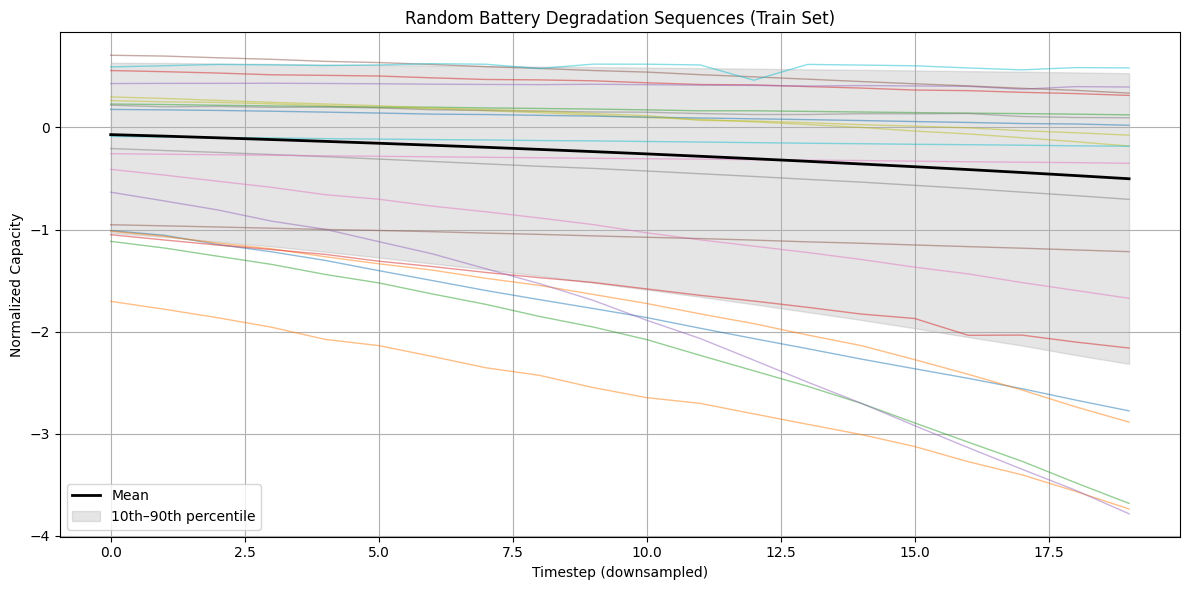

In [ ]:
# How many random samples to plot
n_plot = 20

# Seed for reproducibility
np.random.seed(2)

# Randomly select indices
random_indices = np.random.choice(X_train.shape[0], size=n_plot, replace=False)
subset = X_train[random_indices, :, 0]  # Shape: (n_plot, seq_len)

# Calculate statistics across the whole training set
mean_series = np.mean(X_train[:, :, 0], axis=0)
p10 = np.percentile(X_train[:, :, 0], 10, axis=0)
p90 = np.percentile(X_train[:, :, 0], 90, axis=0)

# Plot
plt.figure(figsize=(12, 6))
for i in range(n_plot):
    plt.plot(subset[i], alpha=0.5, linewidth=1)

plt.plot(mean_series, color='black', linewidth=2, label='Mean')
plt.fill_between(np.arange(mean_series.shape[0]), p10, p90, color='gray', alpha=0.2, label='10th–90th percentile')

plt.title('Random Battery Degradation Sequences (Train Set)')
plt.xlabel('Timestep (downsampled)')
plt.ylabel('Normalized Capacity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


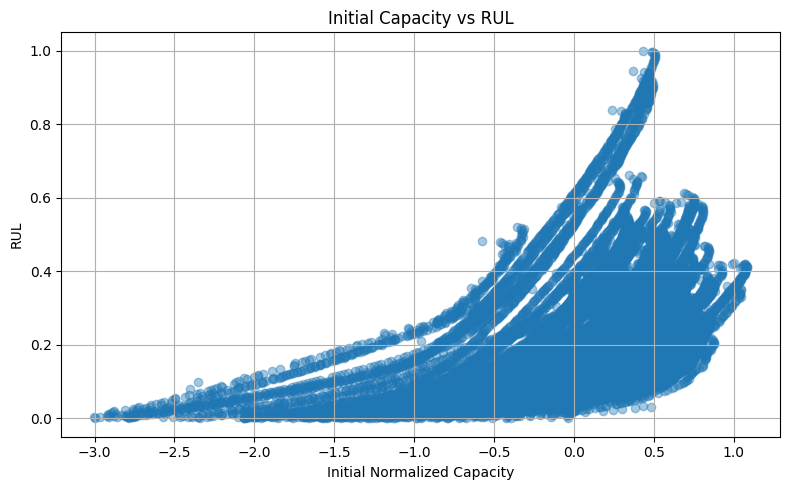

In [5]:
initial_caps = X_train[:, 0, 0]  # First timestep's value per sequence
plt.figure(figsize=(8, 5))
plt.scatter(initial_caps, y_train, alpha=0.4)
plt.title('Initial Capacity vs RUL')
plt.xlabel('Initial Normalized Capacity')
plt.ylabel('RUL')
plt.grid(True)
plt.tight_layout()
plt.show()
